In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [45]:
!pip install tensorflow
from tensorflow import keras

You should consider upgrading via the 'c:\users\csuftitan\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [46]:
import tensorflow as tf
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [47]:
x_test.shape

(10000, 28, 28)

In [48]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [49]:
print("x_train shape:", x_train.shape)

x_train shape: (60000, 28, 28)


In [50]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

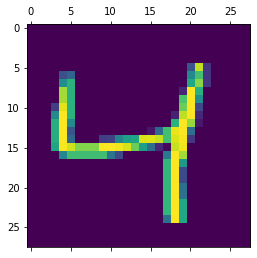

In [51]:
plt.matshow(x_train[2])

In [52]:
y_train[2]

4

In [53]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [54]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [55]:
model = Sequential()

In [56]:
model.add(Flatten(input_shape=[28,28])) #input layer, 28*28 neurons
model.add(Dense(20, activation='relu')) #hidden layer, 20 neurons
model.add(Dense(10, activation='softmax')) #output layer, 10 neurons since 10 digits

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [64]:
# training the dataset
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2146 - accuracy: 0.9389
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1792 - accuracy: 0.9485
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1584 - accuracy: 0.9542
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1449 - accuracy: 0.9573
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1346 - accuracy: 0.9598


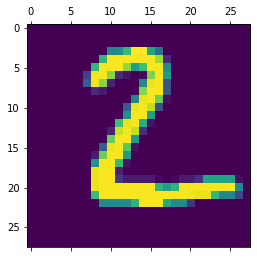

In [71]:
#checking test set values and comaping with the predicted values below
plt.matshow(x_test[1])

In [68]:
# predict the test set
yp = model.predict(x_test)

In [73]:
# predicted values
yp[1]

array([3.3146017e-09, 1.1899359e-01, 8.7908888e-01, 1.8458925e-03,
       1.1727788e-13, 5.3069507e-06, 1.5328201e-08, 5.2737015e-10,
       6.6315602e-05, 1.2198897e-10], dtype=float32)

In [72]:
# returns the max index value in the array
np.argmax(yp[1])

2

In [74]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1461 - accuracy: 0.9584


[0.14611241221427917, 0.9584000110626221]

## Let's increase the number of neurons in the hidden layer and check accuracy

In [75]:
#Lets train the model with 200 neurons in the hidden layer
model.add(Flatten(input_shape=[28,28])) #input layer, 28*28 neurons
model.add(Dense(200, activation='relu')) #hidden layer, 200 neurons
model.add(Dense(10, activation='softmax')) #output layer, 10 neurons since 10 digits

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
_________________________________________________________________
flatten_3 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               2200      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2010      
Total params: 20,120
Trainable params: 20,120
Non-trainable params: 0
__________________________________________________

In [77]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [78]:
# training the dataset
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2440 - accuracy: 0.9551
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1424 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1325 - accuracy: 0.9660
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1251 - accuracy: 0.9683
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1193 - accuracy: 0.9690


In [80]:
# predict the test set
yp1 = model.predict(x_test)

In [81]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1742 - accuracy: 0.9581


[0.17421430349349976, 0.9581000208854675]